# Assignment
[Mark Kaghazgarian](mailto:markteams@gmail.com) - March 2019

## Import libraries and setting notebook

In [1]:
import os
import pandas as pd
import numpy as np
from collections import defaultdict
from itertools import combinations 
import matplotlib.pyplot as plt
import networkx as nx  # use for weighted diagram
import seaborn as sns  # use for waiting time diagram
sns.set()
sns.set_style("dark")
import warnings # disabling networkX deprication warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Loading datasets
For loading csv files, here in the notebook we used relative path. Before running the following path make sure that either you run Jupyter notebook on the root of repository or modify the *BASE_URI* below to your root project path.

**NOTE:** In case of having difficulity on loading output files or facing damage files, please re-run the poem.py script from in the root of project directory by running the following line in terminal to get the instruction.
```bash
$ python poem.py -h
```

In [2]:
# change it if you run the notebook from any other path expect root of the repo
BASE_URI = "./"

# poem_row_word_count_dataframe
prwc_df = pd.read_csv(os.path.join(BASE_URI, "output/data/poem_row_word_count.csv"), 
                      index_col='poem')

# word_frequancy_dataframe
wf_df = pd.read_csv(os.path.join(BASE_URI, "output/data/word_freq.csv"))

# take a look to both datasets
print("Dataset shapes:")
print("Row and word in peom dataset: " + str(prwc_df.shape))
print("Word frequency dataset: " + str(wf_df.shape))
print("="*60)
print(prwc_df.head())
print("="*60)
print(wf_df.head())

Dataset shapes:
Row and word in peom dataset: (50, 2)
Word frequency dataset: (43989, 5)
                        row_count  word_count
poem                                         
Kahdeksaskolmatta runo        147        6702
Kahdeksasneljättä runo        166        7434
Kolmaskymmenes runo           250       11279
Kahdestoista runo             252       11496
Neljäskolmatta runo           264       12059
                     poem         word  count waiting_time  \
0  Kahdeksaskolmatta runo           jo      5        124.0   
1  Kahdeksaskolmatta runo          nyt      2        521.0   
2  Kahdeksaskolmatta runo         ahti      4        54.67   
3  Kahdeksaskolmatta runo  saarelainen      2        164.0   
4  Kahdeksaskolmatta runo         itse      7        123.0   

                       occurances_at  
0             [0, 65, 189, 492, 496]  
1                           [1, 522]  
2                  [2, 83, 158, 166]  
3                           [3, 167]  
4  [4, 249, 296, 351,

## Visualizing the distribution of the rows and words across all poems

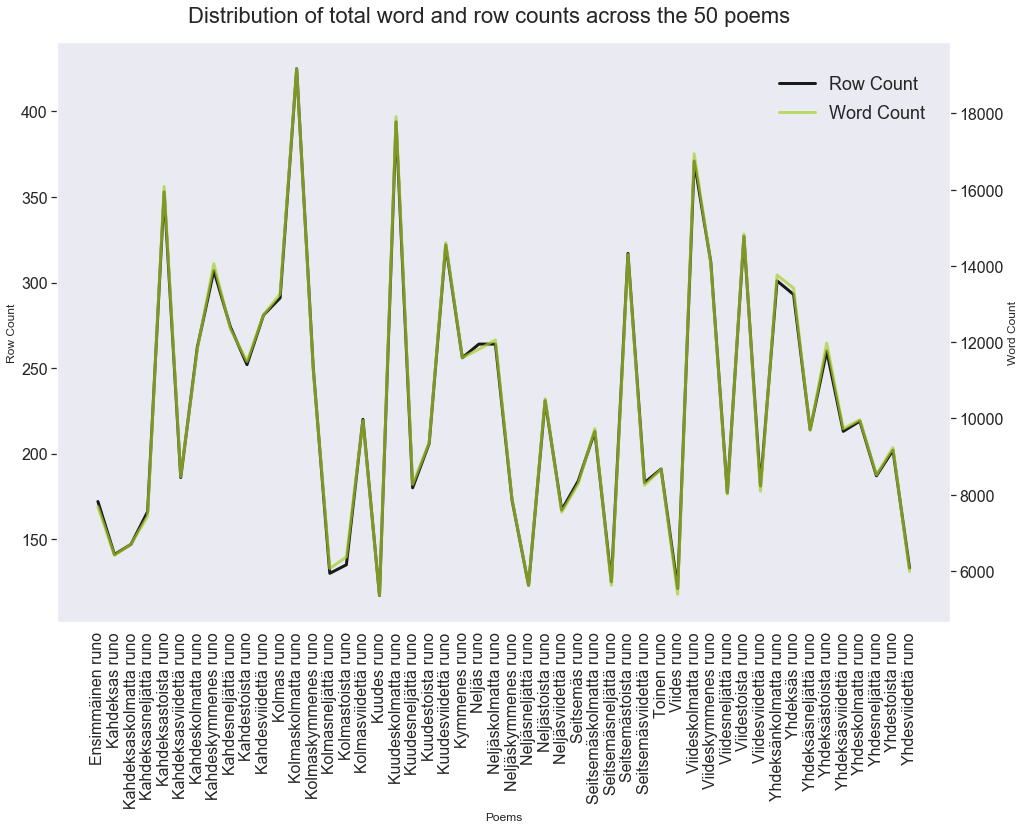

In [3]:
fig, ax_ltr = plt.subplots(figsize=(16, 10))

fig.suptitle('Distribution of total word and row counts across the 50 poems', 
             fontsize=22)
plt.subplots_adjust(top=0.93)

# row count barplot (y-axis of diagram located on left side)
sns.lineplot(ax=ax_ltr, 
             x=prwc_df.index, 
             y="row_count", 
             data=prwc_df, 
             color="#1b1919", 
             label="Row Count",
             linewidth=3, 
             alpha=1,)

# making a copy from the ax to make an overlay
ax_rtl = ax_ltr.twinx()

# word count barplot (y-axis of diagram located on right side)
sns.lineplot(ax=ax_rtl, 
             x=prwc_df.index, 
             y="word_count", 
             data=prwc_df, 
             color="#a7d129", 
             label="Word Count",
             linewidth=3, 
             alpha=0.7)

# rotating all x-axis labels 90degress to increase readability
for item in ax_ltr.get_xticklabels():
    item.set_rotation(90)
    
ax_ltr.legend(loc = (0.80,0.9), frameon = False,fontsize=18)
ax_rtl.legend(loc = (0.80,0.85), frameon = False,fontsize=18)

#plt.xlabel('xlabel', fontsize=18)
ax_ltr.set(ylabel='Row Count', xlabel='Poems')
ax_rtl.set(ylabel='Word Count')
ax_ltr.tick_params(labelsize=16)
ax_rtl.tick_params(labelsize=16)

plt.show()

##  A heuristic approach to extract Keywords for each poem

In order to find keywords for any poem, let's take a look at the distribution of words appearances in each poem. We can filter out words which only appearance once in terms of narrowing down the search area. 

In [4]:
wf_1_out_df = wf_df[wf_df['count'] > 1]

# checking the distribution of words appearances in poems.
def get_stats(group):
    return {'min': group.min(), 'max': group.max(), 'count': group.count(), 'mean': group.mean()}
wf_1_out_df.groupby(['poem'])['count'].apply(get_stats).unstack()

count   max      mean  min
poem                                              
Ensimmäinen runo        129.0  13.0  2.604651  2.0
Kahdeksas runo          125.0  14.0  3.168000  2.0
Kahdeksaskolmatta runo  130.0  12.0  3.023077  2.0
Kahdeksasneljättä runo  159.0  30.0  3.867925  2.0
Kahdeksastoista runo    337.0  32.0  3.359050  2.0
Kahdeksasviidettä runo  167.0  12.0  2.898204  2.0
Kahdeskolmatta runo     215.0  25.0  3.358140  2.0
Kahdeskymmenes runo     327.0  23.0  3.373089  2.0
Kahdesneljättä runo     229.0  16.0  2.777293  2.0
Kahdestoista runo       206.0  22.0  3.213592  2.0
Kahdesviidettä runo     248.0  23.0  3.516129  2.0
Kolmas runo             256.0  45.0  3.574219  2.0
Kolmaskolmatta runo     330.0  23.0  3.121212  2.0
Kolmaskymmenes runo     198.0  18.0  3.095960  2.0
Kolmasneljättä runo     108.0  13.0  3.212963  2.0
Kolmastoista runo       128.0  12.0  3.125000  2.0
Kolmasviidettä runo     185.0  14.0  3.302703  2.0
Kuudes runo             108.0  11.0  2.787037  2.0
Kuudeskolmatta runo     390.0  55.0  3.376923  2.0
Kuudesneljättä runo     166.0  21.0  3.831325  2.0
Kuudestoista runo       203.0  20.0  3.561576  2.0
Kuudesviidettä runo     276.0  23.0  3.442029  2.0
Kymmenes runo           237.0  42.0  3.793249  2.0
Neljäs runo             253.0  25.0  3.415020  2.0
Neljäskolmatta runo     225.0  17.0  3.044444  2.0
Neljäskymmenes runo     150.0  19.0  3.453333  2.0
Neljäsneljättä runo     132.0  10.0  2.734848  2.0
Neljästoista runo       194.0  21.0  3.293814  2.0
Neljäsviidettä runo     121.0  14.0  2.958678  2.0
Seitsemäs runo          153.0  16.0  3.379085  2.0
Seitsemäskolmatta runo  165.0  23.0  3.848485  2.0
Seitsemäsneljättä runo  123.0  21.0  3.479675  2.0
Seitsemästoista runo    237.0  21.0  3.316456  2.0
Seitsemäsviidettä runo  181.0  10.0  3.060773  2.0
Toinen runo             179.0  14.0  2.882682  2.0
Viides runo             128.0  11.0  2.515625  2.0
Viideskolmatta runo     313.0  36.0  3.236422  2.0
Viideskymmenes runo     285.0  30.0  3.203509  2.0
Viidesneljättä runo     176.0  18.0  2.988636  2.0
Viidestoista runo       308.0  32.0  3.399351  2.0
Viidesviidettä runo     127.0  15.0  2.866142  2.0
Yhdeksänkolmatta runo   260.0  32.0  3.676923  2.0
Yhdeksäs runo           262.0  28.0  3.286260  2.0
Yhdeksäsneljättä runo   182.0  21.0  3.384615  2.0
Yhdeksästoista runo     239.0  30.0  3.619247  2.0
Yhdeksäsviidettä runo   198.0  21.0  3.848485  2.0
Yhdeskolmatta runo      176.0  20.0  3.113636  2.0
Yhdesneljättä runo      175.0  19.0  3.177143  2.0
Yhdestoista runo        169.0  23.0  3.414201  2.0
Yhdesviidettä runo       98.0  11.0  3.112245  2.0

Based on the exersice definition, for finding keywords we need to find words which appears in any poem significantly, but rare in general across all poems.  For that, we can find significant words within each poem by sorting the number of times each word appearance in any peom (which already stored in `wf_df`) and select **top n words** out of the list. 

One simple heuristic solution could be, a significant word in a poem, can be considered as a **keyword** if number of occurances in the poem is five times bigger than the average of occurances in all other poems.

$$
count(significant\_ word\_ apprances\_ in\_ a\_ peom)\quad >\quad 5\quad \times \frac { \sum { count(apprances\_ in\_ any\_ poem) }  }{ count(poems)\quad -1 } 
$$

In [5]:
# place holder for keywords
keywords = []

# get the top 5 frequent word in each peom
freq_word_per_poem = wf_1_out_df.groupby('poem')['count'].nlargest(5)

for index, word_freq in freq_word_per_poem.items():
    apperance_same_word_in_other_poems = wf_1_out_df[
        (wf_1_out_df['word'] == wf_1_out_df.loc[index[1],'word']) &   # filter similar word in all poems except current poem
        (wf_1_out_df['poem'] != wf_1_out_df.loc[index[1],'poem'])]['count'] # get the count of apparance
    
    # significant if number of apperance in any poem is more than 
    # five times of average of apprances in all other poems. 
    if word_freq / 5 > apperance_same_word_in_other_poems.sum() / 49:
        keywords.append({'poem': index[0], 
                                     'word': wf_1_out_df.loc[index[1],'word'], 
                                     'freq': word_freq})
        
# convert the list to dataframe for further steps
keywords = pd.DataFrame(keywords)

print("List of keywords in all poems:")
keywords

List of keywords in all poems:


freq                    poem          word
0     13        Ensimmäinen runo         ilman
1      9        Ensimmäinen runo          veen
2      6        Ensimmäinen runo        emonen
3     12          Kahdeksas runo          vaka
4     11          Kahdeksas runo         neiti
5      8  Kahdeksaskolmatta runo         kunne
6     24  Kahdeksasneljättä runo         seppo
7     23  Kahdeksasneljättä runo     ilmarinen
8     19     Kahdeskolmatta runo          kuin
9     18     Kahdeskolmatta runo          itke
10    17     Kahdeskolmatta runo            et
11    15     Kahdeskymmenes runo         kavon
12    15     Kahdeskymmenes runo         hyvän
13    12     Kahdeskymmenes runo         immen
14    15     Kahdesneljättä runo        karjan
15    11     Kahdesneljättä runo         karja
16    22       Kahdestoista runo  lemminkäinen
17    19       Kahdestoista runo         lieto
18    26             Kolmas runo        lauloi
19    23             Kolmas runo         nuori
20    23             Kolmas runo   joukahainen
21    16     Kolmaskolmatta runo           elä
22    13     Kolmaskolmatta runo          kuin
23    11     Kolmasneljättä runo      kalervon
24    10     Kolmasneljättä runo      kullervo
25    12       Kolmastoista runo         lapin
26    10       Kolmastoista runo         hiien
27     9       Kolmastoista runo        hirven
28    10     Kolmasviidettä runo        pohjan
29    10             Kuudes runo   väinämöisen
..   ...                     ...           ...
63     8             Toinen runo         kylvi
64     6             Viides runo      vellamon
65    14     Viideskolmatta runo         tämän
66    13     Viideskolmatta runo          hyvä
67    13     Viideskymmenes runo      marjatta
68    11     Viideskymmenes runo         piika
69    18     Viidesneljättä runo      kalervon
70    18     Viidesneljättä runo         poika
71    17     Viidesneljättä runo      kullervo
72     9     Viidesneljättä runo         lapsi
73    21       Viidestoista runo  lemminkäisen
74    16       Viidestoista runo          äiti
75     6     Viidesviidettä runo         minkä
76     6     Viidesviidettä runo         kivut
77     5     Viidesviidettä runo         kunka
78    32   Yhdeksänkolmatta runo        saaren
79    27   Yhdeksänkolmatta runo  lemminkäinen
80    23   Yhdeksänkolmatta runo         lieto
81    20           Yhdeksäs runo         rauta
82    15   Yhdeksäsneljättä runo         pursi
83    15     Yhdeksästoista runo       manalan
84    14     Yhdeksästoista runo         kokko
85    12      Yhdeskolmatta runo         vävyn
86    11      Yhdeskolmatta runo          vävy
87    19      Yhdesneljättä runo         poika
88    15      Yhdesneljättä runo      kalervon
89    11      Yhdesneljättä runo        untamo
90    21        Yhdestoista runo        saaren
91    10      Yhdesviidettä runo          iloa
92     8      Yhdesviidettä runo    kuulemahan

[93 rows x 3 columns]

## Weighted graph of poems

In order to construct the weighted graph we need to define both vertex(node) and edge of the graph which in this case, according to the exercise definition, nodes are the poems which have similar keywords and edges can be weighted based on number of similar keyworks between any two poems.
`networkx` library has been used for both constructing and visulising the weighted graph but we can other options can be considered as well. For example, we can implement custom classes for graph elements such as, vertex and edge and use class methods for defining nodes, edges and weights. Also, alternatives such as [**Plotly**](https://plot.ly/python/igraph-networkx-comparison/) or [**Bokeh**](https://bokeh.pydata.org/en/latest/docs/user_guide/graph.html) can be used for visualizing the weighted graph.

The solution for constructing weighted graph here is quite straightforward. First, we need to group all the keyboards which we found in previous cell based on poem and extract the lists of groups. Then, iterating over the result and any two poems which have similar keyword increase the weight.

Note that, it is possible any two poems appearance on more than one keyword which causes higher weights on those combinations.

Nodes of weighted-graph: 
  Node: Kolmastoista runo
  Node: Neljästoista runo
  Node: Kahdeksasneljättä runo
  Node: Kymmenes runo
  Node: Seitsemäsneljättä runo
  Node: Neljäsviidettä runo
  Node: Yhdesviidettä runo
  Node: Kolmas runo
  Node: Kuudes runo
  Node: Kolmasneljättä runo
  Node: Kuudesneljättä runo
  Node: Viidesneljättä runo
  Node: Yhdesneljättä runo
  Node: Kahdeskolmatta runo
  Node: Kolmaskolmatta runo
  Node: Neljäskolmatta runo
  Node: Kahdestoista runo
  Node: Kuudeskolmatta runo
  Node: Seitsemäskolmatta runo
  Node: Yhdeksänkolmatta runo
  Node: Kuudestoista runo
  Node: Yhdeksästoista runo
  Node: Kuudesviidettä runo
  Node: Yhdestoista runo
Edges of weighted-graph: 
  Edge: Kolmastoista runo => Neljästoista runo
  Edge: Neljästoista runo => Kuudesviidettä runo
  Edge: Kahdeksasneljättä runo => Kymmenes runo
  Edge: Kahdeksasneljättä runo => Seitsemäsneljättä runo
  Edge: Kymmenes runo => Seitsemäsneljättä runo
  Edge: Neljäsviidettä runo => Yhdesviidettä runo
 

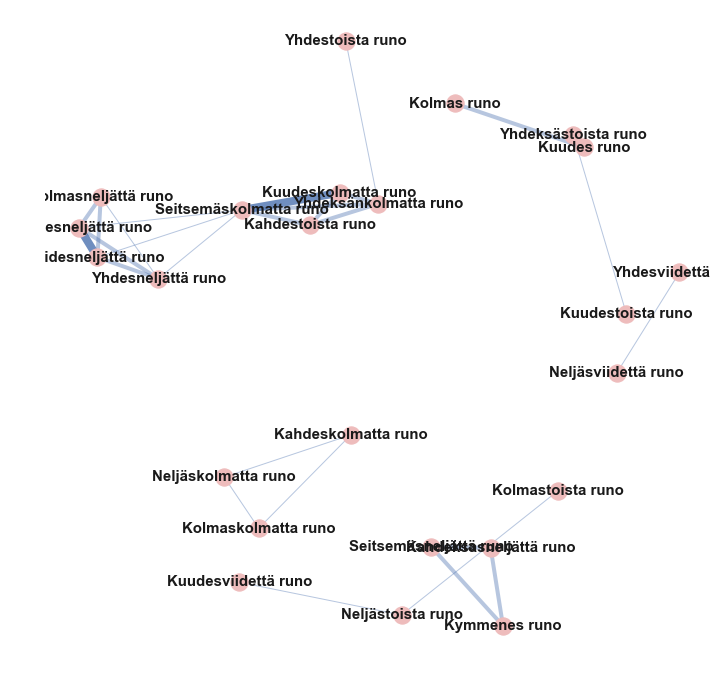

In [6]:
# construcing the graph
plt.figure(figsize=(12,12))
G = nx.Graph()

# initial weights for any edge is 0
weights = defaultdict(int)

# iterating over keywords and increasing the weights
for poems in keywords.groupby('word')['poem'].apply(list):
    # unique keywords within all poems can be excluded for weighted graph
    if len(poems) >= 2:
        # make a list of any possible combinations of poems for each keyword
        for edge in list(combinations(poems, 2)):
            # sort poem names alphabetically and use then as key for weights dict
            # increasing the weight on each occurance on same combination 
            weights[(min(edge[0],edge[1]),max(edge[0],edge[1]))] += 1

# Adding edge to the weighted graph by considering weight
for v,w in weights.items():
    G.add_edge(v[0],v[1],weight=w)

# defining various classes for edges with different weights
# NOTE: Loop hasn't been used for the sake of code readability
strong = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] == 3]
medium = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] == 2]
low = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] == 1]


# setting the graph aesthetics 
pos = nx.spring_layout(G, k=0.75, iterations=50)  # positions for all nodes
plt.axis('off')

# adding nodes
nx.draw_networkx_nodes(G, pos, node_color='#eebcbc')

# adding edges
nx.draw_networkx_edges(G, pos, edgelist=strong,
                       width=8, alpha=0.8, edge_color='b')
nx.draw_networkx_edges(G, pos, edgelist=medium,
                       width=4, alpha=0.4, edge_color='b')
nx.draw_networkx_edges(G, pos, edgelist=low,
                       width=1, alpha=0.4, edge_color='b')
# adding labels
nx.draw_networkx_labels(G, pos, font_size=15, 
                        font_family='sans-serif',
                        font_weight='bold')

print("Nodes of weighted-graph: ")
for node in G.nodes():
    print("  Node: " + node)
print("="*60)
print("Edges of weighted-graph: ")
for edge in G.edges():
    print("  Edge: " + edge[0] + " => " + edge[1])
    
plt.show()

#### What we found 
Clearly, we can see some clusters of peoms among all poems by having various bonds to each other. Within all the clusters, there are 3 loop paths by having relatively strong weights which might be considered as an indication for some relation between those poems.

Loops with more strong weights:
- Kahdenksasnelikatta runo, Kymmenes runo and Seitsemasnelijatta runo.
- Kolmasnelijatta, Viidesnelijatta runo, Kuudesneljatta runo and Yhdeksankolmatta runo.
- Yhdeksankolmatta runo, Kuudeskolmatta runo, Kahdestoista runo and Seitsemaskolmatta runo

Also, two of above mentioned loops are connected to eachother via **Seitsemaskolmatta runo** poem which is the biggest cluster in the whole weighted diagram.

#### Alternatives / better solutions for b and c

Probably, one better approach for solving b and c parts is using **NLP(natural language processing)** for analysing and getting insights out of the poem contexts. In python, tools like **[NLTK](http://www.nltk.org/)** or **[TextBlob](https://textblob.readthedocs.io/en/dev/index.html)** or even **[SpaCy](https://spacy.io/)** are more common libraries to use on this matter. Considering the Support of the target language (Finnish in this case) is quite important and within mentioned tools probably SpaCy is not a good choice due to missing of support for many languages including Finnish. 

One big advantage of using NLP tools is leveraging many built-in functions and algorithms for detecting the **keywords** and understanding the context of the texts. Also, getting some basic stats like what we manually achieved in the first part of the exercise (counting rows and words and calcualting word waiting intervals) can be easily extracted by using NLP libraries.

One shortcoming of the heuristic solution in this notebook is we didn't consider the length of the poems on defining the significant level on word appearances. Means, maybe a candidate keyword in a relatively long peom is not really appereance significant enough if we consider the length of the poem compare to the average. The solution would perform more accurate if we use some kind of standardization on the length of poems and reflect that in the above formula.

Another improvement would be having a list of all [stop words](https://en.wikipedia.org/wiki/Stop_words) and excluding them from the list of keyword candidates. For that, many of NLP tools can provide lists of stopWords in various languages which can be used through the process of detecting keywords.